# **Training AI Unlimited data**

Opening the .csv file with pandas

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/BMA/lyrics-data-clean-without-10-trimmed.csv')

train_labels = train['genre']
train_data = train['lyrics']

print(train_data[0]
)

way walk find else go leave tell love really believe floor door knee cause way walk hear feel know see prove love crawl foot look ground footprint cause way walk put low go lie leave pride go know cause help see way walk put low way walk


**Vectorize the data using TFIDF**

This creates a word occurrence frequency (sparse) matrix.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np


# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
X = vectorizer.fit_transform(train['lyrics'].values.astype('U'))

#save vocab for testing
vocab = vectorizer.vocabulary_

y = train_labels


Train the CatBoostClassifier model with 85% of the data

The remaining 15% are used for testing it

X is the data, y are the labels e.g. "Hip Hop", "Pop" etc.

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=167)

eval_dataset = Pool(X_valid,
                    y_valid)


model = CatBoostClassifier(eval_metric='AUC',
                           iterations=3731,
                           task_type="GPU",
                            border_count=2,
                           random_seed=1,
                            verbose=100)

model.fit(X_train, y_train, eval_set=eval_dataset, use_best_model=True)

model.save_model('lyrics_recognizer')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.063036


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7805098	best: 0.7805098 (0)	total: 63ms	remaining: 3m 54s
100:	test: 0.8748439	best: 0.8753420 (95)	total: 4.29s	remaining: 2m 34s
200:	test: 0.8809874	best: 0.8809874 (200)	total: 7.71s	remaining: 2m 15s
300:	test: 0.8902032	best: 0.8904012 (295)	total: 11.3s	remaining: 2m 8s
400:	test: 0.8917544	best: 0.8922550 (380)	total: 14.1s	remaining: 1m 57s
500:	test: 0.8939996	best: 0.8939996 (500)	total: 16.8s	remaining: 1m 48s
600:	test: 0.8962875	best: 0.8966895 (585)	total: 18.2s	remaining: 1m 34s
700:	test: 0.9002628	best: 0.9002628 (700)	total: 19.4s	remaining: 1m 24s
800:	test: 0.8998201	best: 0.9002628 (700)	total: 20.6s	remaining: 1m 15s
900:	test: 0.9002943	best: 0.9006541 (860)	total: 21.8s	remaining: 1m 8s
1000:	test: 0.9009886	best: 0.9013355 (970)	total: 23s	remaining: 1m 2s
1100:	test: 0.9010842	best: 0.9013355 (970)	total: 24.2s	remaining: 57.7s
1200:	test: 0.9015109	best: 0.9019044 (1190)	total: 25.4s	remaining: 53.5s
1300:	test: 0.9010661	best: 0.9019044 (1190)	to

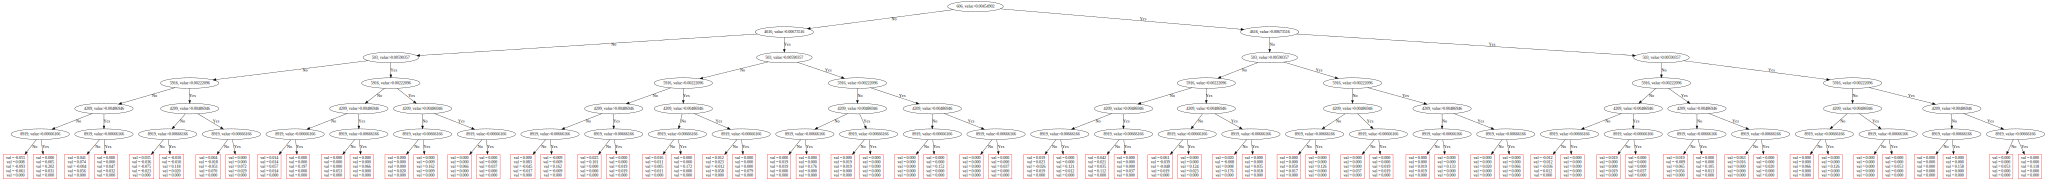

In [ ]:


pool = Pool(
    X_train,
    y_train,
)

model.plot_tree(
    tree_idx=0,
    pool=pool,
)

# **Testing the model and predicting genres**

In [ ]:
input_lyrics = input('Enter the full lyrics: ')


Enter the full lyrics: Check out the real situation Nation war against nation Where did it all begin, when will it end Well it seems like total destruction The only solution And there ain't no use No one can stop them now Ain't no use nobody can stop them now  Give them an inch they take a yard Give them yard they take a mile Once a man and twice a child And everything is just for a while It seems like total destruction The only solution And there ain't no use No one can stop them now Ain't no use no one can stop them now Ain't no use no one can stop them now Ain't no use no one can stop them now  Check in the real situation Check it out, check it out Nation fight against nation Where did it all begin, where will it end. Well it seems like total destruction The only solution No use can't stop them Ain't no use can't stop them Ain't no use no one can't stop them now Can't stop them now Ain't no use no one can stop them now Ain't no use you even try. Ain't no use got to say bye bye Ain't

Importing and downloading libraries needed for removing unnessecary words

In [ ]:
import nltk
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Functions for removing special characters, lemmatizing the text (getting the root word of each word by comparing the words next to it; and filtering out the stopwords, which don't bring value to the text**

In [ ]:
def remove_special_characters_from_lyrics(song):

 # Remove brackets and content inside both brackets
 song = re.sub('\(.*?\)|\[.*?\]', "", song)
 # Remove special characters but keep spaces, apostrophes and hyphens
 song = re.sub('[^a-zA-Z0-9 \'-]', " ", song)
 return song


# Lemmatization of lyrics using Spacy -> Using AI to find the root word
def lemmatization(text, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    # Requirements: pip install spacy-lookups-data
    nlp = spacy.load("en_core_web_sm")
    nlp.remove_pipe("ner")
    nlp.remove_pipe("parser")

    doc = nlp(text)
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags:
            new_text.append(token.lemma_)
    final = " ".join(new_text)
    text = final
    return text


# Remove stop words from lyrics
def filter_stopwords_from_lyrics(song):

    # Convert text to lowercase and split to a list of words
    tokens = word_tokenize(song.lower())
    # Remove stop words
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    song = " ".join(tokens_wo_stopwords)
    return song


def clean_lyrics(lyrics):
  lyrics = remove_special_characters_from_lyrics(lyrics)
  lyrics = lemmatization(lyrics)
  lyrics = filter_stopwords_from_lyrics(lyrics)
  return lyrics


Cleaning and vectorizing the lyrics

In [ ]:
input_lyrics = clean_lyrics(input_lyrics)
#print(input_lyrics)

input_lyrics_array = [input_lyrics]

df = pd.DataFrame(input_lyrics_array, columns=['lyrics'])

#print(df.head())
# create the transform
vectorizer = TfidfVectorizer(vocabulary=vocab)
# tokenize and build vocab

vectorized_input = vectorizer.fit_transform(df['lyrics'].values.astype('U'))


Predicting the genre

In [ ]:
preds = model.predict(vectorized_input)
preds_proba = model.predict_proba(vectorized_input)

print("The Song is: ", preds[0][0])
print("-----------")
print ("Guesses in order:")
output = preds_proba
genres = model.classes_

indices = output.argsort()[0][-3:][::-1]

# Print out the genres and their corresponding probabilities
for i in range(3):
    genre = genres[indices[i]]
    probability = output[0][indices[i]]
    probability_percent = round(probability*100,2) # convert the probability to percent and round to 2 decimal places
    print(f"{genre}: {probability_percent}%")


The Song is:  Reggae
-----------
Guesses in order:
Reggae: 47.98%
Hard Rock: 39.3%
Pop: 6.75%


# **Get optimized text**

In [ ]:
input_lyrics = input('Enter the full lyrics: ')


Enter the full lyrics: I know you so well, so well I mean, I can do anything that he can I've been pretty I know you're somewhere, somewhere I've been trapped in my mind girl, just holding on I don't wanna pretend there's something, we're nothing I've been stuck thinking 'bout her, I can't hold back I'm in pain, wanna put ten shots in my brain I've been tripping 'bout some things, can't change Suicidal, same time I'm tame Picture this, in bed, get a phone call Girl that you fucked with killed herself That was this summer and nobody helped And ever since then, man, I hate myself Wanna fucking end it Pessimistic All wanna see me with no pot to piss in But niggas been excited 'bout the grave I'm digging Having conversations about my haste decisions Fucking sickening At the same time, memory surfaced through the grapevine 'Bout my uncle playing with a slipknot Post traumatic stress got me fucked up Been fucked up since a couple months they had a nigga locked up I be feeling pain, I be feel

Importing and downloading libraries needed for removing unnessecary words

In [ ]:
import nltk
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Functions for removing special characters, lemmatizing the text (getting the root word of each word by comparing the words next to it; and filtering out the stopwords, which don't bring value to the text**

In [ ]:
def remove_special_characters_from_lyrics(song):

 # Remove brackets and content inside both brackets
 song = re.sub('\(.*?\)|\[.*?\]', "", song)
 # Remove special characters but keep spaces, apostrophes and hyphens
 song = re.sub('[^a-zA-Z0-9 \'-]', " ", song)
 return song


# Lemmatization of lyrics using Spacy -> Using AI to find the root word
def lemmatization(text, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    # Requirements: pip install spacy-lookups-data
    nlp = spacy.load("en_core_web_sm")
    nlp.remove_pipe("ner")
    nlp.remove_pipe("parser")

    doc = nlp(text)
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags:
            new_text.append(token.lemma_)
    final = " ".join(new_text)
    text = final
    return text


# Remove stop words from lyrics
def filter_stopwords_from_lyrics(song):

    # Convert text to lowercase and split to a list of words
    tokens = word_tokenize(song.lower())
    # Remove stop words
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    song = " ".join(tokens_wo_stopwords)
    return song


def clean_lyrics(lyrics):
  print("Original: ", lyrics)
  lyrics = remove_special_characters_from_lyrics(lyrics)
  lyrics = lemmatization(lyrics)
  print("Lemma: ", lyrics)

  lyrics = filter_stopwords_from_lyrics(lyrics)
  print("Stopwords: ", lyrics)

  return lyrics


Cleaning and vectorizing the lyrics

In [ ]:
input_lyrics = clean_lyrics(input_lyrics)
print(input_lyrics)

Original:  I know you so well, so well I mean, I can do anything that he can I've been pretty I know you're somewhere, somewhere I've been trapped in my mind girl, just holding on I don't wanna pretend there's something, we're nothing I've been stuck thinking 'bout her, I can't hold back I'm in pain, wanna put ten shots in my brain I've been tripping 'bout some things, can't change Suicidal, same time I'm tame Picture this, in bed, get a phone call Girl that you fucked with killed herself That was this summer and nobody helped And ever since then, man, I hate myself Wanna fucking end it Pessimistic All wanna see me with no pot to piss in But niggas been excited 'bout the grave I'm digging Having conversations about my haste decisions Fucking sickening At the same time, memory surfaced through the grapevine 'Bout my uncle playing with a slipknot Post traumatic stress got me fucked up Been fucked up since a couple months they had a nigga locked up I be feeling pain, I be feeling pain jus